

---



# MVP Análise de Dados e Boas Práticas

**Nome:** Gaetano Signorini

**Matrícula:** 4052024001993

**Dataset:** [Personality Dataset](https://raw.githubusercontent.com/gaedesig/MVP_3/refs/heads/main/personality_dataset.csv)

 **------**

# Descrição do Problema



O conjunto de dados personality, de traços de personalidade extrovertidos vs. Introvertidos, é uma coleção de dados comportamentais e sociais que captura indicadores-chave de extroversão e introversão.
Este conjunto de dados contém 2.900 entradas com 7 características relacionadas ao comportamento social e traços de personalidade, projetado para explorar e classificar indivíduos como extrovertidos ou introvertidos.
O conjunto de dados fornece insights sobre comportamentos como tempo gasto sozinho, participação em eventos sociais e engajamento em mídias sociais.


## Hipóteses do Problema

*  **1 -**  Das sete características listadas, qual ou quais mais influenciariam na definição do tipo de personalidade?

*  **2 -** O receio em se expor em público é determinante nessa classificação?
*  **3 -** Uma pessoa mais ativa nas redes sociais, tende mais a ser extrovertida?


*  **4 -**  A intensidade de  relação social na vida real, fora das redes, ainda pesa bastante na classificação?




## Tipo de Problema

Com características comportamentais como, frequência de participação em eventos sociais, tempo gasto sozinho, postura em redes sociais entre outras, trata-se de um problema de classificação supervisionada, que busca definir o tipo de personalidade (Introvertido ou extrovertido), baseado nos valores desses atributos.

## Seleção de Dados
**Dataset Personality**

O dataset personality foi extraído do ambiente Kaggle. Contém valores nulos, atributos numéricos e categóricos e classe-alvo (personalidade) balanceada.

## Atributos do Dataset


possui sete atributos e uma variável alvo:

- **time_spent_alone:** número de horas que um indivíduo normalmente passa sozinho diariamente.
- **stage_fear:** se sente muito desconforto em se expor/falar perante público.
- **social_event_attendance:** frequência de participação em eventos sociais.
- **going_outside:** Com que frequência o indivíduo sai de casa.
- **drained_after_socializing:** se o indivíduo se sente esgotado após socializar.
- **friends_circle_size:** número de amigos próximos.
- **post_frequency:** frequência de postagens em redes sociais.
- **personality:** variável-alvo, (Introvertido, Extrovertido).



---


---





# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Personality.

In [8]:
# Carregamento de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')


In [9]:
# carregamento do dataset armazenado no github
data_set = 'https://raw.githubusercontent.com/gaedesig/MVP_3/refs/heads/main/personality_dataset.csv'

In [10]:
# guardando o dataset em um dataframe - df_personality
df_personality = pd.read_csv(data_set)

In [11]:
# Exibindo primeiras linhas do dataframe
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Análise de Dados

Na etapa de análise de dados exploratória (EDA), vamos uma buscar uma visão geral do dataset personality e tentar entender padrões, correlações e características das variáveis ou qualquer observação decorrente dessa própria análise.



---



Para agilizar o raciocínio, vou traduzir o nome das colunas para português.

In [12]:
# Exibindo nomes atuais das colunas no dataframe df_personality
df_personality.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [13]:
# Criando um dataframe df_personalidade renomeando as colunas traduzidas
df_personalidade = df_personality.rename(columns={
    'Time_spent_Alone': 'tempo_sozinho',
    'Stage_fear': 'medo_em_publico',
    'Social_event_attendance': 'presenca_eventos_sociais',
    'Going_outside': 'eventos_externos',
    'Drained_after_socializing': 'esgotado_apos_socializar',
    'Friends_circle_size': 'circulo_de_amigos',
    'Post_frequency': 'frequencia_de_postagens',
    'Personality': 'personalidade'
})

In [14]:
# Exibindo primeiras linhas do novo dataframe
df_personalidade.head()

,tempo_sozinho,medo_em_publico,presenca_eventos_sociais,eventos_externos,esgotado_apos_socializar,circulo_de_amigos,frequencia_de_postagens,personalidade
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Total e Tipo das Instâncias



In [15]:
df_personalidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tempo_sozinho             2837 non-null   float64
 1   medo_em_publico           2827 non-null   object 
 2   presenca_eventos_sociais  2838 non-null   float64
 3   eventos_externos          2834 non-null   float64
 4   esgotado_apos_socializar  2848 non-null   object 
 5   circulo_de_amigos         2823 non-null   float64
 6   frequencia_de_postagens   2835 non-null   float64
 7   personalidade             2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


O dataset personality possui 2900 instâncias, definidas pelos atributos numéricos ( tempo_sozinho, presenca_eventos_sociais,  eventos_externos, circulo_de_amigos e frequencia_de_postagens)  e categóricos (medo_em_publico, esgotado_apos_socializar e personalidade ).



---



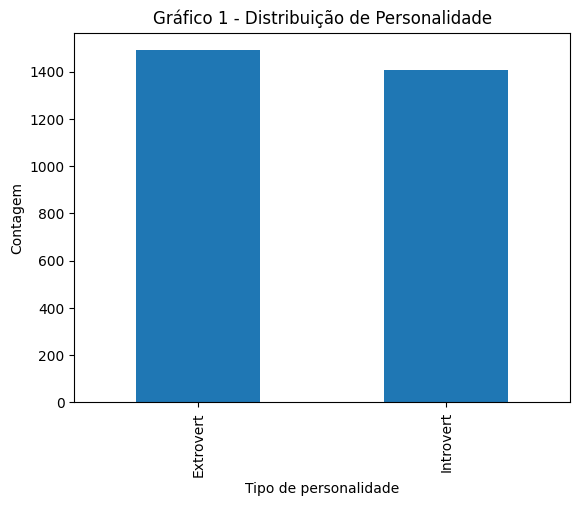

,count
personalidade,
Extrovert,1491
Introvert,1409


In [16]:
# Analisando balanceamento da classe personalidade
df_personalidade['personalidade'].value_counts().plot(kind='bar')
plt.title('Gráfico 1 - Distribuição de Personalidade')
plt.xlabel('Tipo de personalidade')
plt.ylabel('Contagem')
plt.show()

df_personalidade['personalidade'].value_counts()

O **Gráfico 1** mostra a distribuição balanceada com aproximadamente 50% de registros para cada uma das duas classificações (introverted, extroverted)   sendo 1491 classificados com extroverted e 1409, como introverted.



---


## Estatísticas Descritivas



In [17]:
# estatísticas descritivas básicas do dataset
df_personalidade.describe()

,tempo_sozinho,presenca_eventos_sociais,eventos_externos,circulo_de_amigos,frequencia_de_postagens
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
# estatísticas de todas variáveis, inclusive categóricas.
df_personalidade.describe(include='all')

# Análise variáveis numéricas



---


### Média


In [18]:
# média dos atributos numéricos do dataset
df_personalidade.describe().loc['mean']

,mean
tempo_sozinho,4.505816
presenca_eventos_sociais,3.963354
eventos_externos,3.000000
circulo_de_amigos,6.268863
frequencia_de_postagens,3.564727




---



## Mediana

In [19]:
# mediana dos atributos numéricos do dataset
df_personalidade.describe().loc['50%']

,50%
tempo_sozinho,4.0
presenca_eventos_sociais,3.0
eventos_externos,3.0
circulo_de_amigos,5.0
frequencia_de_postagens,3.0


## Comparação entre médias e medianas dos valores numéricos

Gerando um gráfico que mostre a média, mediana e amplitude de valores (range) das variáveis numéricas (tempo_sozinho, horas_de_estudo_semana, gasto_medio_lazer_mensal, etc.). Comparar a média e a mediana  permitirá identificar se a distribuição de uma variável é simétrica ou assimétrica.

Além disso, determinar a amplitude de valores (range), que abrange desde o valor mínimo ao valor máximo de cada variável. Isso me permitirá entender a dispersão total dos dados, revelando a extensão completa dos valores da variável, se possuem grande variabilidade ou se os dados estão mais concentrados.



---



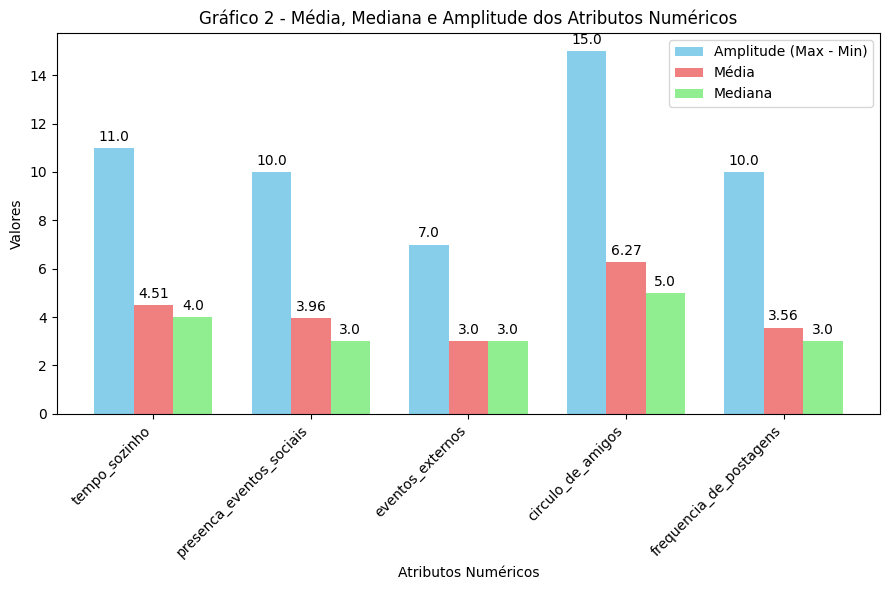

In [20]:
# Calculando a média, a mediana e a amplitude (máximo - mínimo) para cada coluna numérica
numeric_stats = df_personalidade.describe().loc[['mean', '50%', 'min', 'max']]
numeric_stats.loc['amplitude'] = numeric_stats.loc['max'] - numeric_stats.loc['min']
numeric_stats = numeric_stats.rename(index={'50%': 'median'}) # Renomeia '50%' para 'median'

# Selecionando apenas as colunas numéricas para o gráfico
numeric_stats = numeric_stats[df_personalidade.select_dtypes(include=np.number).columns]

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 6))

# Largura das barras
bar_width = 0.25

# Posições das barras no eixo x
indices = np.arange(len(numeric_stats.columns))

# Barras da amplitude
rects1 = ax.bar(indices - bar_width, numeric_stats.loc['amplitude'], bar_width,
                label='Amplitude (Max - Min)', color='skyblue')

# Barras da média
rects2 = ax.bar(indices, numeric_stats.loc['mean'], bar_width,
                label='Média', color='lightcoral')

# Barras da mediana
rects3 = ax.bar(indices + bar_width, numeric_stats.loc['median'], bar_width,
                label='Mediana', color='lightgreen')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Atributos Numéricos')
ax.set_ylabel('Valores')
ax.set_title('Gráfico 2 - Média, Mediana e Amplitude dos Atributos Numéricos')
ax.set_xticks(indices)
ax.set_xticklabels(numeric_stats.columns, rotation=45, ha="right")
ax.legend()

# Função para adicionar rótulos nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adicionando os rótulos de valor nas barras
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Layout ajustado para evitar sobreposição dos rótulos
plt.tight_layout()
plt.show()

O **Gráfico 2** mostra:

Para **tempo_sozinho**, a média (4.51) e a mediana (4.0) são próximas, indicando uma distribuição razoavelmente simétrica. A amplitude de 11.0 sugere uma boa variação nos dados de "tempo sozinho", indicando que as pessoas têm quantidades bem diferentes de tempo sozinhas.

Para **presenca_eventos_sociais**, a média (3.96) e a mediana (3.00) mostram uma pequena diferença, com a média um pouco maior, o que pode indicar uma leve assimetria à direita (cauda para valores mais altos). A amplitude de 10.0 também indica uma boa variabilidade na "presença em eventos sociais".

Para **eventos_externos**, a média (3.00) e a mediana (3.00) são idênticas, sugerindo uma distribuição simétrica. A amplitude de 7.0 mostra uma variação razoável.

Para **circulo_de_amigos**, a média (6.27) é maior que a mediana (5.00), indicando assimetria à direita. Há pessoas com círculos de amigos maiores que puxam a média para cima. Esta variável tem a maior amplitude (15.0) entre todas, indicando a maior variabilidade no tamanho do "círculo de amigos". Há pessoas com círculos de amigos muito pequenos e outras com círculos muito grandes.

Para **frequencia_de_postagens**, a média (3.56) e a mediana (3.00) também mostram uma assimetria à direita. A amplitude de 10.0 indica uma boa variação na "frequência de postagens".



---



### Desvio Padrão

In [21]:
# desvio padrão dos atributos numéricos do dataset
df_personalidade.describe().loc['std']

,std
tempo_sozinho,3.479192
presenca_eventos_sociais,2.903827
eventos_externos,2.247327
circulo_de_amigos,4.289693
frequencia_de_postagens,2.926582


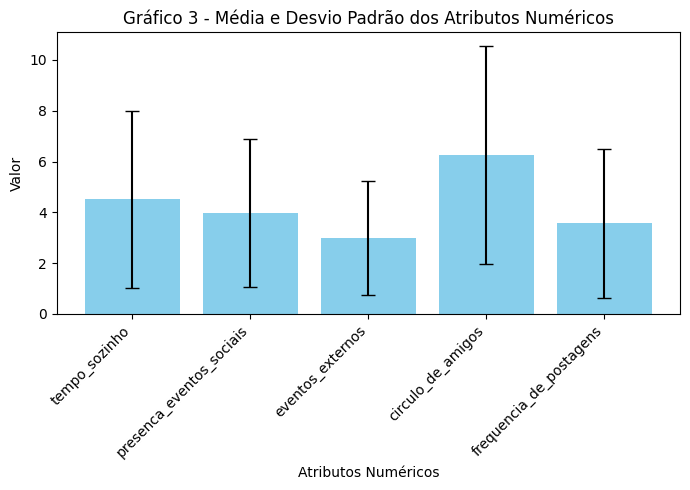

In [22]:
# Demonstrando a o desvio-padrão dos atributos numéricos em relação à média

mean_std_df = df_personalidade.select_dtypes(include=np.number).agg(['mean', 'std']).T

plt.figure(figsize=(7, 5))
plt.bar(mean_std_df.index, mean_std_df['mean'], yerr=mean_std_df['std'], capsize=5, color='skyblue')
plt.title('Gráfico 3 - Média e Desvio Padrão dos Atributos Numéricos')
plt.xlabel('Atributos Numéricos')
plt.ylabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O **Gráfico 3** demonstra o desvio-padrão em relação às médias de cada atributo numérico. As barras indicam a média, as linhas verticais em cima de cada barra representam o desvio-padrão.


* **tempo_sozinho** - A barra de erro é visivelmente alta. Olhando o gráfico, o topo da linha está perto de 8 e a base perto de 1, indicando um desvio padrão de aproximadamente 3.5. A variável tempo_sozinho tem uma média moderada, mas um desvio padrão considerável. Isso significa que, embora a média seja 4.5, os valores individuais de "tempo sozinho" se espalham bastante em torno dessa média. Há uma boa diversidade na quantidade de tempo sozinho entre as pessoas.

* **presenca_eventos_sociais** - A barra de erro é também considerável, mas um pouco menor que tempo_sozinho. O topo está perto de 7, base perto de 1, indicando um desvio padrão de aproximadamente 3.0. em uma média similar a tempo_sozinho, mas com um desvio padrão ligeiramente menor. Isso indica que os dados para esta variável estão um pouco mais concentrados em torno da média do que tempo_sozinho, mas ainda com uma boa variabilidade.

* **eventos_externos** - Esta variável tem a menor barra de erro, com o topo perto de 5 e a base perto de 1, indicando um desvio padrão de aproximadamente 2.0. Tem a menor média e, mais importante, o menor desvio padrão. Isso significa que os valores para "eventos externos" são mais consistentes e menos dispersos em torno da média em comparação com as outras variáveis. As pessoas tendem a ter uma quantidade mais similar de eventos externos.

* **circulo_de_amigos** - Esta variável apresenta a maior barra de erro, com o topo perto de 10.5 e a base perto de 2, indicando um desvio padrão de aproximadamente 4.2. possui a maior média e, significativamente, o maior desvio padrão entre todas as variáveis. Isso confirma que há uma enorme variabilidade no tamanho do círculo de amigos das pessoas. Os dados estão muito espalhados, o que pode indicar a presença de muitos valores extremos (pessoas com poucos amigos e pessoas com muitos amigos), tornando a média menos representativa do "típico".

* **frequencia_de_postagens** - A barra de erro é alta, similar a presenca_eventos_sociais, com o topo perto de 6.5 e a base perto de 0.5, indicando um desvio padrão de aproximadamente 3.0. Tem uma média moderada e um desvio padrão considerável. Isso indica uma boa variabilidade na frequência com que as pessoas fazem postagens, com os valores se espalhando bastante em torno da média.



---



## Histograma

Analisando a distribuição dos valores das variáveis **frequencia_de_postagens** e **tempo_sozinho**

### *frequencia_de_postagens*

A a distribuição dos valores de frequencia_de_postagens e tentar entender sua influência na classificação da personalidade.

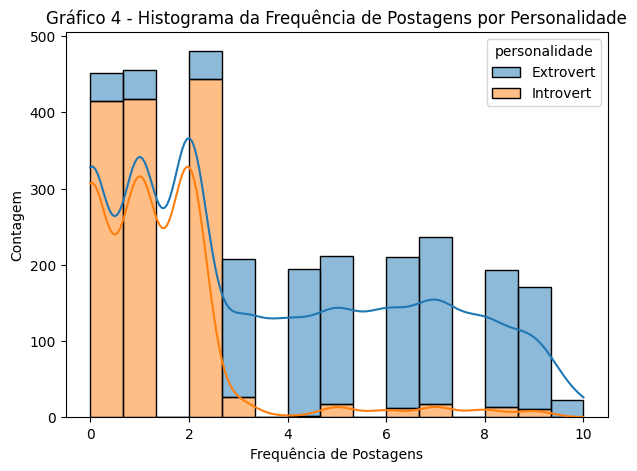

In [23]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_personalidade, x='frequencia_de_postagens', hue='personalidade', multiple="stack", kde=True)
plt.title('Gráfico 4 - Histograma da Frequência de Postagens por Personalidade')
plt.xlabel('Frequência de Postagens')
plt.ylabel('Contagem')
plt.show()

 O **Gráfico 4** mostra que Extrovertidos postam nas redes sociais com muito mais frequência que os Introvertidos. A partir de quatro postagens ou mais, é nítida a quantidade bem inferior de Introvertidos em relação as Extrovertidos.

 Os Extrovertidos dominam claramente esta faixa. Eles são os principais responsáveis pelas postagens mais frequentes, enquanto os Introvertidos quase desaparecem.



---



### *tempo_sozinho*

Vamos analisar a distribuição dos valores de tempo_sozinho e tentar entender sua influência na classificação da personalidade.

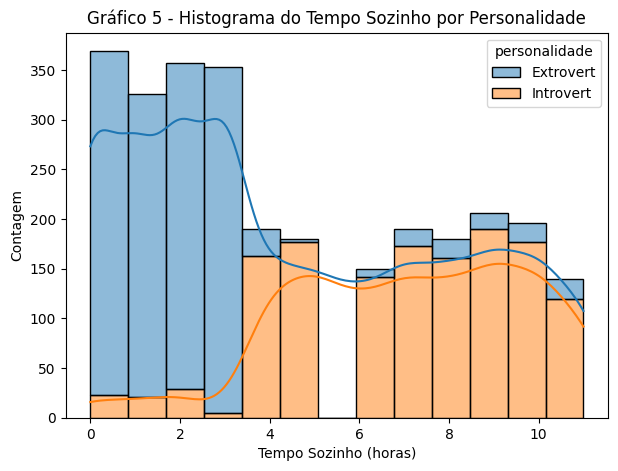

In [24]:
#
plt.figure(figsize=(7, 5))
sns.histplot(data=df_personalidade, x='tempo_sozinho', hue='personalidade', multiple="stack", kde=True)
plt.title('Gráfico 5 - Histograma do Tempo Sozinho por Personalidade')
plt.xlabel('Tempo Sozinho (horas)')
plt.ylabel('Contagem')
plt.show()

O **Gráfico 5** mostra claramente que, a partir de um período de quatro horas, o número de Introvertidos, cresce de forma muito acentuada. O **Gráfico 5** demonstra também que, aproximadamente, 80% (oitenta por cento) dos classificados como Introvertido, passam por períodos superiores a quatro horas sozinhos.



---

## Boxplot

Para analisar como nossas variáveis numéricas se distribuem em relação aos tipos de personalidade, utilizaremos gráficos Boxplot, que permitirão ver Mediana e Quartis, identificar a dispersão dos dados, detectar outliers e comparar grupos. Os dois próximos gráficos nos permitirão entender as distribuições das variáveis **tempo_sozinho** e **frequencia_de_postagens**.



---



In [25]:
# Estatísticas descritivas agrupadas por personalidade
df_personalidade.groupby('personalidade').describe()

tempo_sozinho                                                \
                      count      mean       std  min  25%  50%  75%   max   
personalidade                                                               
Extrovert            1457.0  2.067261  2.208781  0.0  1.0  2.0  3.0  11.0   
Introvert            1380.0  7.080435  2.612803  0.0  5.0  7.0  9.0  11.0   

              presenca_eventos_sociais            ... circulo_de_amigos        \
                                 count      mean  ...               75%   max   
personalidade                                     ...                           
Extrovert                       1463.0  6.016405  ...              12.0  15.0   
Introvert                       1375.0  1.778909  ...               4.0  14.0   

              frequencia_de_postagens                                          \
                                count      mean       std  min  25%  50%  75%   
personalidade                                                                   
Extrovert                      1458.0  5.638546  2.341549  0.0  4.0  6.0  7.0   
Introvert                      1377.0  1.368918  1.566034  0.0  0.0  1.0  2.0   

                     
                max  
personalidade        
Extrovert      10.0  
Introvert       9.0  

[2 rows x 40 columns]

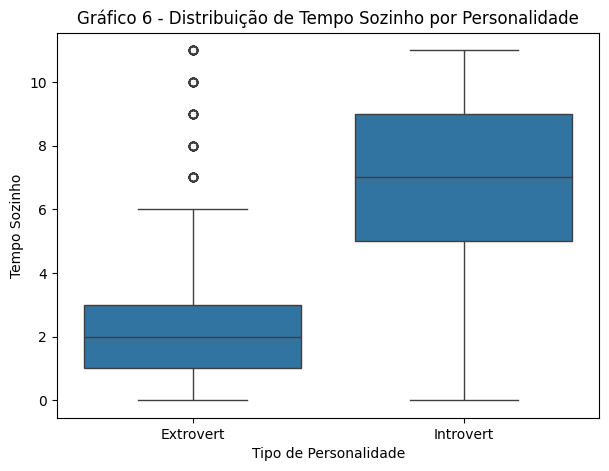

In [26]:
# Analisando atributo tempo_sozinho com boxplot
target_column = 'personalidade'

# Coluna específica para plotar
selected_column = 'tempo_sozinho'

# Criando uma nova figura para o boxplot
plt.figure(figsize=(7, 5))

# Gerando o boxplot para a coluna selecionada
sns.boxplot(x=target_column, y=selected_column, data=df_personalidade)

# Definindo o título do gráfico
plt.title(f'Gráfico 6 - Distribuição de {selected_column.replace("_", " ").title()} por Personalidade')

# Adicionando rótulos aos eixos para melhor clareza
plt.xlabel('Tipo de Personalidade')
plt.ylabel(selected_column.replace('_', ' ').title())

# Exibe o gráfico
plt.show()

O **Gráfico 6**, boxplot de tempo_sozinho por personalidade, indica claramente que o **Extrovertido** passa muito menos tempo sozinho, apesar de alguns outliers. Há vários pontos acima do bigode superior (em 7, 8, 9, 10, 11 e 12 horas). Isso sugere que, embora a maioria dos Extrovertidos passe pouco tempo sozinho, existe um pequeno número de Extrovertidos que passam um tempo considerável sozinhos, sendo considerados outliers em seu próprio grupo.

A presença de outliers no grupo **Extrovertido** é interessante. Sugere que, mesmo entre pessoas que geralmente se energizam com interações sociais, há um subgrupo que ocasionalmente passa bastante tempo sozinho.

**Introvertidos**, em contraste, tendem a passar significativamente mais tempo sozinhos, com sua distribuição "deslocada" para valores maiores.

A diferença nas medianas (Extrovertidos em **~2h** vs. Introvertidos em **~7h**) é muito significativa. Isso mostra que o "tempo sozinho" é uma característica distintiva forte entre os dois tipos de personalidade.



---

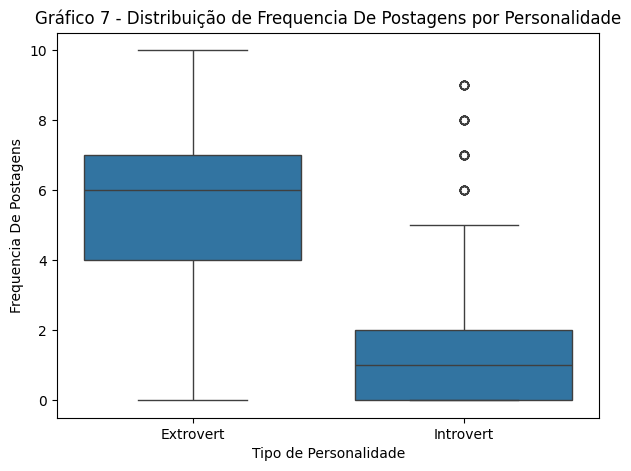

In [27]:
# Agora, analisando atributo frequencia_de_postagens com boxplot

target_column = 'personalidade'

# Coluna específica para plotar
selected_column = 'frequencia_de_postagens'

# Criando uma nova figura para o boxplot
plt.figure(figsize=(7, 5)) # Você pode ajustar o tamanho da figura aqui

# Gerando o boxplot para a coluna selecionada
sns.boxplot(x=target_column, y=selected_column, data=df_personalidade)

# Definindoo título do gráfico
plt.title(f'Gráfico 7 - Distribuição de {selected_column.replace("_", " ").title()} por Personalidade')

# Adicionando rótulos aos eixos para melhor clareza
plt.xlabel('Tipo de Personalidade')
plt.ylabel(selected_column.replace('_', ' ').title())

# Exibe o gráfico
plt.show()

O **Gráfico 7**, boxplot de frequencia_de_postagens por personalidade demonstra que, apesar de alguns outliers, classificados como **Introvertidos** postam muito menos em redes sociais.

O **Gráfico 7**  mostra também que Frequencia De Postagens é uma feature  poderosa e discriminatória para diferenciar entre Extrovertidos e Introvertidos. A distinção entre os dois grupos é muito clara e alinhada com as expectativas de comportamento social digital.  A diferença nas medianas (**Extrovertidos** em ~6.0 postagens vs. **Introvertidos** em ~1.0 postagem) é extremamente significativa.

A presença de outliers no grupo **Introvertido** (aqueles que postam mais do que o típico Introvertido) é um ponto interessante. Isso mostra que, mesmo dentro de um grupo que geralmente é mais reservado, há indivíduos que se desviam do padrão e participam mais ativamente em postagens. Isso pode ser explorado para entender subgrupos ou nuances dentro da introversão.



---



## Matriz de Correlação
Vamos entender a relação linear que os atributos numéricos das personalidades podem ter.

In [28]:
# Calculaando a matriz de correlação para os atributos numéricos
# Selecionando apenas as colunas numéricas do DataFrame
numeric_df = df_personalidade.select_dtypes(include=np.number)

# Calculando a matriz de correlação
correlation_matrix = numeric_df.corr()

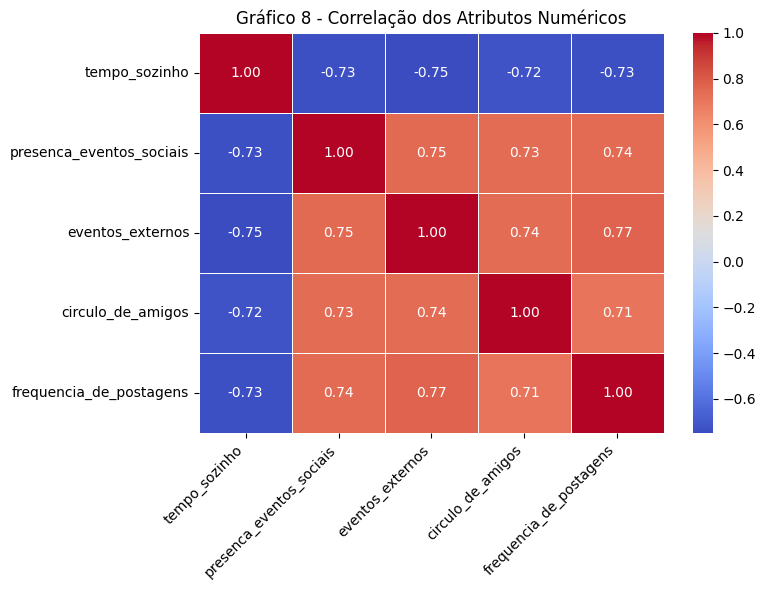

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Gráfico 8 - Correlação dos Atributos Numéricos')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


O **Gráfico 8** mostra:

*  **tempo_sozinho** tem forte correlação negativa com **presenca_eventos_sociais** (-0.73). Quando o **tempo_sozinho** aumenta, a presença em eventos sociais tende a diminuir. Isso faz  sentido, pois são atividades que muitas vezes se excluem ou são complementares no oposto (quem busca um, busca menos o outro).

  O mesmo acontece com **eventos_externos** (-0.75), mais tempo sozinho está associado a menos eventos externos.
  
  Outra forte correlação negativa de **tempo_sozinho** é com **circulo_de_amigos** (-0.72). Mais tempo sozinho está associado a ter um círculo de amigos menor. Também faz  sentido, pois um círculo de amigos maior geralmente implica mais interações sociais.
  
  A correlação entre **tempo_sozinho** e **frequencia_de_postagens** também é negativa (-0.73), mais tempo sozinho está associado a uma menor frequência de postagens.  Nesse caso, embora as postagens possam ser uma forma de interação social, intuitivamente, sempre concluí o contrário, ou seja, achava que quanto mais tempo a pessoa passava sozinha, maior seria o número de postagens. Essa análise confirma a necessidade de, antes de tudo, estudar os dados, suas relações e suas distribuições e depois começar a tirar conclusões.
  
  Podemos concluir que a variável **tempo_sozinho** tem fortes correlações negativas com todas as outras variáveis de interação social.

* A correlação entre **presenca_eventos_sociais** e **eventos_externos** é fortemente positiva (0.75). As pessoas que participam mais de eventos sociais também tendem a participar mais de eventos externos. Isso é esperado, pois ambos descrevem um comportamento social ativo.

  Outra forte correlação positiva de **presenca_eventos_sociais** é com **circulo_de_amigos** (0.73). Maior presença em eventos sociais está associada a ter um círculo de amigos maior.
  **presenca_eventos_sociais** também se correlaciona fortemente positivo com **frequecia_de_postagens** (0.74) Pessoas que frequentam mais eventos sociais tendem a ter maior frequência de postagens. Justamente o contrário da relação entre **tempo_sozinho** e **frequencia_de_postagens**.  



---



## Análise variáveis categóricas


Para visualizar a distribuição das respostas em relação às variáveis categóricas **medo_em_publico** e **esgotado_apos_socializar**, utilizarei gráficos de barras simples para entender a frequência com que cada categoria aparece em uma única variável.

Busco:

Visualizar frequências: Mostrar de forma clara a contagem ou a proporção de cada categoria.

Identificar a categoria Mais Comum: Rapidamente poderei ver qual resposta é a mais frequente para cada pergunta.

Compreender a composição do Grupo: com uma visão imediata de como o  grupo de estudo se divide em relação a cada uma dessas características isoladamente.

Compreender a prevalência de Cada Experiência: Qual a proporção de participantes que relatam ter **medo_em_publico** e qual a proporção que se sente **esgotado_apos_socializar**.

Perfil do Grupo: Terei uma ideia mais clara da intensidade de cada uma dessas características na nossa amostra.


--- Contagem e Proporção de 'medo_em_publico' ---
Contagem:
 medo_em_publico
No     1417
Yes    1410
Name: count, dtype: int64
Proporção (%):
 medo_em_publico
No     50.12
Yes    49.88
Name: proportion, dtype: float64
--------------------------------------------------

--- Contagem e Proporção de 'esgotado_apos_socializar' ---
Contagem:
 esgotado_apos_socializar
No     1441
Yes    1407
Name: count, dtype: int64
Proporção (%):
 esgotado_apos_socializar
No     50.6
Yes    49.4
Name: proportion, dtype: float64
--------------------------------------------------

--- Contagens 'Personalidade' vs 'medo_em_publico'  ---
medo_em_publico    No   Yes
personalidade              
Extrovert        1338   111
Introvert          79  1299
--------------------------------------------------

--- Contagens 'Personalidade' vs 'esgotado_apos_socializar'  ---
esgotado_apos_socializar    No   Yes
personalidade                       
Extrovert                 1362   111
Introvert                   79  1296
-

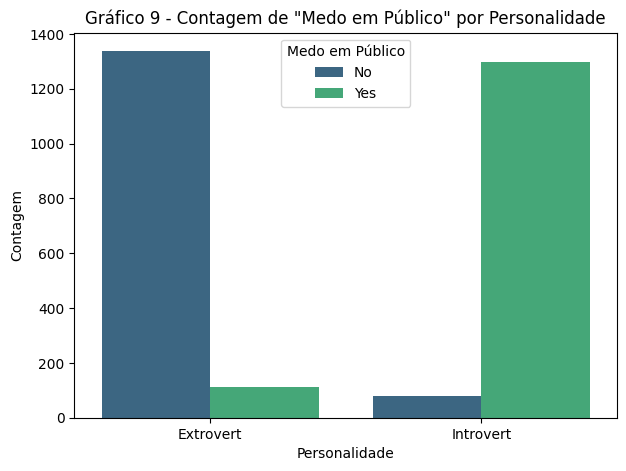

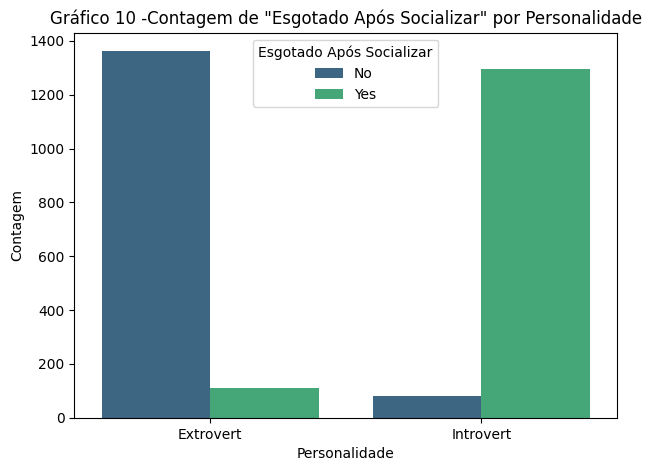

In [30]:


# Análisando Contagem e Frequência Relativa (Proporção)

print("\n--- Contagem e Proporção de 'medo_em_publico' ---")
contagem_medo_em_publico = df_personalidade['medo_em_publico'].value_counts()
proporcao_medo_em_publico = df_personalidade['medo_em_publico'].value_counts(normalize=True) * 100 # Multiplicar por 100 para percentual
print("Contagem:\n", contagem_medo_em_publico)
print("Proporção (%):\n", proporcao_medo_em_publico.round(2)) # Arredondar para 2 casas decimais
print("-" * 50)

print("\n--- Contagem e Proporção de 'esgotado_apos_socializar' ---")
contagem_esgotado_apos_socializar = df_personalidade['esgotado_apos_socializar'].value_counts()
proporcao_esgotado_apos_socializar = df_personalidade['esgotado_apos_socializar'].value_counts(normalize=True) * 100
print("Contagem:\n", contagem_esgotado_apos_socializar)
print("Proporção (%):\n", proporcao_esgotado_apos_socializar.round(2))
print("-" * 50)




# Análise Cruzamento de Duas Categóricas

print("\n--- Contagens 'Personalidade' vs 'medo_em_publico'  ---")
tabela_personalidade_medo = pd.crosstab(df_personalidade['personalidade'], df_personalidade['medo_em_publico'])
print(tabela_personalidade_medo)
print("-" * 50)

print("\n--- Contagens 'Personalidade' vs 'esgotado_apos_socializar'  ---")
tabela_personalidade_esgotado = pd.crosstab(df_personalidade['personalidade'], df_personalidade['esgotado_apos_socializar'])
print(tabela_personalidade_esgotado)
print("-" * 50)

# Exemplo de proporções por linha (percentual de YES/NO dentro de cada Personalidade)
print("\n--- Proporções por Linha - % 'Personalidade' vs 'medo_em_publico' () ---")
tabela_personalidade_medo_prop_linha = pd.crosstab(df_personalidade['personalidade'], df_personalidade['medo_em_publico'], normalize='index') * 100
print(tabela_personalidade_medo_prop_linha.round(2))
print("-" * 50)

# Visualização Gráficos de Barras Agrupados

plt.figure(figsize=(7, 5))
sns.countplot(x='personalidade', hue='medo_em_publico', data=df_personalidade, palette='viridis')
plt.title('Gráfico 9 - Contagem de "Medo em Público" por Personalidade')
plt.xlabel('Personalidade')
plt.ylabel('Contagem')
plt.legend(title='Medo em Público')
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x='personalidade', hue='esgotado_apos_socializar', data=df_personalidade, palette='viridis')
plt.title('Gráfico 10 -Contagem de "Esgotado Após Socializar" por Personalidade')
plt.xlabel('Personalidade')
plt.ylabel('Contagem')
plt.legend(title='Esgotado Após Socializar')
plt.show()



Para entender como uma variável categórica binária (Medo em Público: 'Yes'/'No') se distribui dentro de cada categoria da sua variável target (Personalidade: Extrovert/Introvert), gerei o **Gráfico 9**.


* O **Gráfico 9** mostra que uma esmagadora maioria de **Extrovertidos** (cerca de 1350) indica **não** ter medo em público. A contagem de **Extrovertidos** que indicam ter medo em público é muito pequena (cerca de 100). Isso é altamente consistente com a definição de extroversão, que geralmente envolve conforto e habilidade em interações sociais e em destaque.

 Para os **Introvertidos**, a situação é invertida. Uma esmagadora maioria de **Introvertidos** (cerca de 1300) indica **ter** medo em público. A contagem de **Introvertidos** que indicam não ter medo é muito pequena. Isso é totalmente consistente com a definição de introversão, que muitas vezes está associada a uma preferência por ambientes mais calmos e menor conforto em situações de exposição pública.
Vemos também que praticamente metade da base de dados respondeu 'No' (1417 pessoas, 50.12%) para **medo_em_publico**.
A outra metade respondeu 'Yes' (1410 pessoas, 49.88%) para **medo_em_publico**.
Isso indica que a variável medo_em_publico é muito bem balanceada no dataset, com aproximadamente o mesmo número de pessoas em cada categoria. Isso melhora a modelagem, pois o modelo não será "viesado" a prever uma categoria em detrimento da outra devido à desproporção.


Para entender a distribução da variável categórica esgotado_apos_socializar, gerei o **Gráfico 10**

* O **Gráfico 10** mostra que ma enorme maioria de **Extrovertidos** indica NÃO se sentir esgotado após socializar. A contagem de **Extrovertidos** que se sentem esgotados é muito pequena. Isso é consistente com a teoria da extroversão, onde interações sociais são fontes de energia e não de esgotamento.

 Para os **Introvertidos**, a situação é claramente inversa. Uma esmagadora maioria de **Introvertidos** indica SIM se sentir esgotado após socializar. A contagem de **Introvertidos** que não se sentem esgotados é mínima. Isso é  consistente com a teoria da introversão, onde a socialização tende a consumir energia e pode levar ao esgotamento.

  **Extrovertidos** têm uma alta contagem em 'No' (1362) e baixa em 'Yes' (111). **Introvertidos** têm uma baixa contagem em 'No' (79) e alta em 'Yes' (1296).

Ambos os gráficos de contagem (Medo em Público e Esgotado Após Socializar) e as tabelas de contingência numéricas demonstram que essas duas variáveis categóricas são  poderosas para diferenciar **Extrovertidos** de **Introvertidos** no dataset.

Medo em Público é um diferenciador fortíssimo, com quase 95% de precisão na distinção baseada na resposta 'Yes' ou 'No'.

Esgotado Após Socializar é igualmente poderoso, com uma clareza impressionante na polarização das respostas entre os dois grupos.

Essas variáveis categóricas provavelmente serão as mais importantes em qualquer modelo preditivo  para identificar a personalidade, pois elas capturam diretamente características centrais de extroversão e introversão.



---



# Pré-Processamento de Dados

Aqui, vou preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do modelo de classificação, em etapas seguintes.

 -- Defino as features e a variável target

-- Divido os dados em conjuntos de treino e teste

-- Aplico o pré-processamento dos dados, com:

      -- tratamento de valores faltantes,

      -- codificação de variáveis categóricas,

      -- codificação da variável target e

      -- escalonamento de variáveis numéricas.

Deixando o conjunto pronto para ser treinado e testado por um modelo de classificação.




In [ ]:
# Revisitando informações sobre o dataset
df_personalidade.info()

Começo definindo as features (X) e a varável target (y)  

In [31]:
# Separando as features (X) e target(y)
X = df_personalidade.drop('personalidade', axis=1)
y = df_personalidade['personalidade']

In [32]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2320, 7)
Dimensões de X_test: (580, 7)
Dimensões de y_train: (2320,)
Dimensões de y_test: (580,)


## Tratamento de valores faltantes (missing values)

In [34]:
# Levantando missing values
print("\nVerificando valores ausentes (X_train):")
print(X_train.isnull().sum())
print("\nVerificando valores ausentes (X_test):")
print(X_test.isnull().sum())


Verificando valores ausentes (X_train):
tempo_sozinho               48
medo_em_publico             61
presenca_eventos_sociais    48
eventos_externos            54
esgotado_apos_socializar    41
circulo_de_amigos           56
frequencia_de_postagens     49
dtype: int64

Verificando valores ausentes (X_test):
tempo_sozinho               15
medo_em_publico             12
presenca_eventos_sociais    14
eventos_externos            12
esgotado_apos_socializar    11
circulo_de_amigos           21
frequencia_de_postagens     16
dtype: int64


Para lidar com os valores nulos presentes na base de dados. Dada a natureza e o tamanho relativamente pequeno do conjunto de dados (2900 linhas), optei por não remover nenhuma linha que contenha valores ausentes.


Em vez de excluir dados possivelmente valiosos, aplicarei a imputação, preenchendo os valores nulos com moda para colunas categóricas e mediana para colunas numéricas.

Com isso, pretendo:

Preservar Dados: Evitar a perda de informações importantes, mantendo o tamanho original da base.

Manter a Integridade da Análise: Garantir que não introduzirei viés ao remover observações que poderiam conter padrões relevantes.



---

In [35]:
# Definindo colunas Categóricas para imputação pela moda
categorical_columns = ['medo_em_publico', 'esgotado_apos_socializar']

In [36]:
# Definindo colunas Numéricas para imputação pela mediana
numeric_columns = ['tempo_sozinho', 'presenca_eventos_sociais', 'eventos_externos', 'circulo_de_amigos', 'frequencia_de_postagens']

In [37]:
# Imputação para colunas categóricas
for col in categorical_columns:
    moda_treino = X_train[col].mode()[0] # Calcula a moda no conjunto de treino
    X_train[col].fillna(moda_treino, inplace=True)
    X_test[col].fillna(moda_treino, inplace=True) # Aplica a mesma moda no teste

In [38]:
# Imputação para colunas numéricas
for col in numeric_columns:
    mediana_treino = X_train[col].median() # Calcula a mediana no conjunto de treino
    X_train[col].fillna(mediana_treino, inplace=True)
    X_test[col].fillna(mediana_treino, inplace=True) # Aplica a mesma mediana no teste

In [39]:
# Confirmando imputação
print("\nVerificando valores ausentes após imputação (X_train):")
print(X_train.isnull().sum())
print("\nVerificando valores ausentes após imputação (X_test):")
print(X_test.isnull().sum())


Verificando valores ausentes após imputação (X_train):
tempo_sozinho               0
medo_em_publico             0
presenca_eventos_sociais    0
eventos_externos            0
esgotado_apos_socializar    0
circulo_de_amigos           0
frequencia_de_postagens     0
dtype: int64

Verificando valores ausentes após imputação (X_test):
tempo_sozinho               0
medo_em_publico             0
presenca_eventos_sociais    0
eventos_externos            0
esgotado_apos_socializar    0
circulo_de_amigos           0
frequencia_de_postagens     0
dtype: int64


## Codificação de Variáveis Categóricas (Features de Entrada)

Para **medo_em_publico** e **esgotado_apos_socializar**

Na sequência do pré-processamento, vou codificar essa duas variáveis features categóricas utilizando o mapeamento binário.

Essas variáveis categóricas, que contêm respostas como "yes/no", precisam ser transformadas em um formato numérico que os algoritmos possam entender.

O mapeamento binário é a forma mais simples e direta de fazer essa transformação, convertendo cada categoria em um valor numérico ( 0 ou 1). Isso  permite:

Tornar os Dados Compreensíveis: Traduzir categorias textuais para um formato numérico que os modelos podem processar.

Simplificar a Representação: Apresentar informações categóricas de forma eficiente, sem adicionar complexidade desnecessária.



---



In [40]:
# Mapeamento para converter 'Yes'/'No' para 1/0
mapeamento_binario = {'Yes': 1, 'No': 0}
X_train['medo_em_publico'] = X_train['medo_em_publico'].map(mapeamento_binario)
X_test['medo_em_publico'] = X_test['medo_em_publico'].map(mapeamento_binario)
X_train['esgotado_apos_socializar'] = X_train['esgotado_apos_socializar'].map(mapeamento_binario)
X_test['esgotado_apos_socializar'] = X_test['esgotado_apos_socializar'].map(mapeamento_binario)
print("\nValores de 'medo_em_publico' após codificação (X_train):")
print(X_train['medo_em_publico'].value_counts())
print("\nValores de 'esgotado_apos_socializar' após codificação (X_train):")
print(X_train['esgotado_apos_socializar'].value_counts())


Valores de 'medo_em_publico' após codificação (X_train):
medo_em_publico
0    1192
1    1128
Name: count, dtype: int64

Valores de 'esgotado_apos_socializar' após codificação (X_train):
esgotado_apos_socializar
0    1192
1    1128
Name: count, dtype: int64


In [41]:
# Visualizando
X_train.head()

,tempo_sozinho,medo_em_publico,presenca_eventos_sociais,eventos_externos,esgotado_apos_socializar,circulo_de_amigos,frequencia_de_postagens
2078,3.0,0,5.0,6.0,0,10.0,9.0
163,6.0,1,3.0,3.0,1,1.0,0.0
1938,10.0,1,2.0,2.0,1,1.0,0.0
252,9.0,1,1.0,2.0,1,3.0,1.0
2232,10.0,1,0.0,0.0,1,4.0,1.0


## Codificação da variável target (personalidade)



Para a variável target **personalidade**, que possui as categorias 'Introverted' e 'Extroverted', também aplicarei uma codificação binária.

Seguindo a convenção:

**Introverted** será transformado para **1**.

**Extroverted** será transformado para **0**.

Essa padronização numérica é fundamental para que o modelo possa aprender a prever corretamente a personalidade, facilitando sua interpretação e o treinamento.



---



In [42]:

le = LabelEncoder()
# Fit no y_train e transforma y_train
y_train = le.fit_transform(y_train)
# Apenas transforma y_test usando o LabelEncoder já treinado
y_test = le.transform(y_test)
print("\nClasses codificadas da variável 'personalidade':", le.classes_)
print("Primeiros 5 valores de y_train após codificação:", y_train[:5])
print("Primeiros 5 valores de y_test após codificação:", y_test[:5])


Classes codificadas da variável 'personalidade': ['Extrovert' 'Introvert']
Primeiros 5 valores de y_train após codificação: [0 1 1 1 1]
Primeiros 5 valores de y_test após codificação: [1 0 1 1 1]


## Escalonamento de variáveis numéricas
A próxima etapa no pré-processamento é o escalonamento das variáveis numéricas: '**tempo_sozinho**', '**presenca_eventos_sociais**', '**eventos_externos**', '**circulo_de_amigos**' e '**frequencia_de_postagens**'.

As variáveis possuem diferentes escalas de valores (por exemplo, '**tempo_sozinho**' vai até 11, enquanto '**circulo_de_amigos**' vai até 15). Essa diferença pode causar problemas para alguns algoritmos de aprendizado de máquina, que são sensíveis à magnitude dos dados.

O escalonamento garante que:

Todas as variáveis tenham a mesma "importância" para o modelo, evitando que aquelas com valores maiores dominem o processo de aprendizado.

Ao padronizar as escalas, preparo os dados para que o modelo possa aprender de maneira mais eficaz e justa, sem ser enganado pelas diferenças de magnitude.



---



In [43]:

scaler = StandardScaler()

# Aplica StandardScaler nas colunas numéricas de treino
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Aplica StandardScaler nas colunas numéricas de teste (usando o scaler treinado no treino)
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

print("\nPrimeiras 5 linhas das colunas numéricas de X_train após escalonamento:")
print(X_train[numeric_columns].head())
print("\nPrimeiras 5 linhas das colunas numéricas de X_test após escalonamento:")
print(X_test[numeric_columns].head())


Primeiras 5 linhas das colunas numéricas de X_train após escalonamento:
      tempo_sozinho  presenca_eventos_sociais  eventos_externos  \
2078      -0.434339                  0.370282          1.348934   
163        0.437596                 -0.325027         -0.001941   
1938       1.600175                 -0.672682         -0.452233   
252        1.309531                 -1.020336         -0.452233   
2232       1.600175                 -1.367991         -1.352816   

      circulo_de_amigos  frequencia_de_postagens  
2078           0.895706                 1.879889  
163           -1.233673                -1.224761  
1938          -1.233673                -1.224761  
252           -0.760478                -0.879799  
2232          -0.523880                -0.879799  

Primeiras 5 linhas das colunas numéricas de X_test após escalonamento:
      tempo_sozinho  presenca_eventos_sociais  eventos_externos  \
141        1.600175                 -0.325027         -0.001941   
1557      -0



---



In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2320 entries, 2078 to 860
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tempo_sozinho             2320 non-null   float64
 1   medo_em_publico           2320 non-null   int64  
 2   presenca_eventos_sociais  2320 non-null   float64
 3   eventos_externos          2320 non-null   float64
 4   esgotado_apos_socializar  2320 non-null   int64  
 5   circulo_de_amigos         2320 non-null   float64
 6   frequencia_de_postagens   2320 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 145.0 KB


In [ ]:
X_train.head()

In [45]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2320, 7)
Dimensões de X_test: (580, 7)
Dimensões de y_train: (2320,)
Dimensões de y_test: (580,)


As fortes correlações posisitvas de alguns atributos guiam para a aplicação de PCA. Mas, como entendo que a base já tem poucos atributos, não aplicarei.

## Testando os dados pré-processados em um modelo LogisticRegression

Agora que os dados estão pré-processados, farei um teste inicial com um modelo de Regressão Logística. Este não é o treinamento final do modelo, mas sim uma etapa rápida para avaliar superficialmente a qualidade da  base de dados após todas as transformações.


Optei pela Regressão Logística para este teste rápido porque ela é um algoritmo eficiente para classificações binárias, ideal para uma verificação preliminar, e permite entender rapidamente se as variáveis pré-processadas já mostram alguma relação com a variável target.

Este passo  ajudará a ter uma primeira impressão de como o conjunto de dados pré-processado se comporta em um modelo básico, confirmando se as etapas de tratamento e transformação foram eficazes para preparar os dados.



---



In [46]:
# Inicializando e treinando o modelo de Regressão Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [47]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [48]:
# Avaliando o desempenho do modelo com a métrica acurácia
print("Avaliação do Modelo de Regressão Logística:")
print("\nAcurácia:", accuracy_score(y_test, y_pred))


Avaliação do Modelo de Regressão Logística:

Acurácia: 0.9241379310344827


## Avaliação Preliminar do Modelo de Regressão Logística
Após o pré-processamento dos dados e um teste inicial com um modelo de Regressão Logística, obtive uma Acurácia de 0.9241.

Este resultado indica que, aproximadamente, 92.41% das previsões do modelo estão corretas no conjunto de dados pré-processado. Considerando que segui as boas práticas, aplicando as transformações após o holdout e asssim descartando um possível overfitting,  Uma acurácia inicial tão alta é um forte indicativo de que as etapas de tratamento e transformação dos dados foram bem-sucedidas em preparar o conjunto de dados para a modelagem.

Isso  dá confiança para prosseguir para as próximas fases de avaliação e construção de modelos mais robustos.

# Conclusão

As hipóteses levantadas no início foram:


   **1 -** Das sete características listadas, qual ou quais mais influenciariam na definição do tipo de personalidade?

*  Os histogramas(**Gráficos 4 e 5**) e boxplots(**Gráficos 6 e 7**)  indicaram concentrações bem definidas e distintas em atributos como **tempo_sozinho**, **frequencia_de_postagens**. Esses gráficos indicam esses atributos como features discriminitórias.
* Os **Gráficos 9 e 10**, demonstram que as variáveis categóricas **medo_em_publico** e **esgotado_apos_socializar**, também são altamente definidoras da variável target personalidade.



---

 **2 -**  O receio em se expor em público é determinante nessa classificação?

*  O **Gráfico 11**, abaixo, mostra que, realmente, cada classificação tem esse atributo bem definido. A maioria absoluta de cada classe Introvertidos, tem medo de se expor em público. Enquanto que a maioria dos Extrovertidos, não.

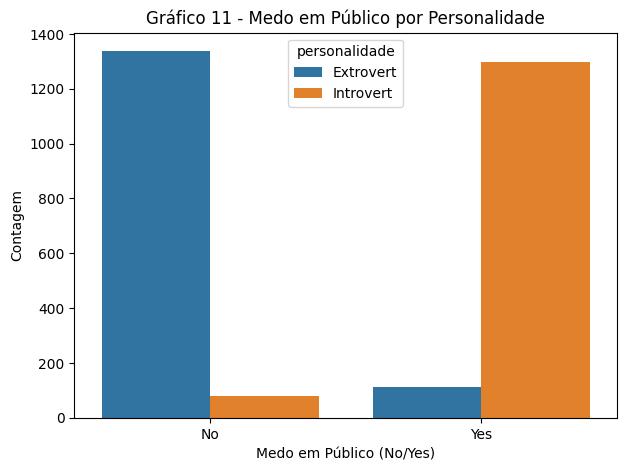

In [49]:
# 2 -  O receio em se expor em público é determinante nessa classificação?
# Gráfico 11
plt.figure(figsize=(7, 5))
sns.countplot(data=df_personalidade, x='medo_em_publico', hue='personalidade')
plt.title('Gráfico 11 - Medo em Público por Personalidade')
plt.xlabel('Medo em Público (No/Yes)')
plt.ylabel('Contagem')
plt.show()



---



**3 -** Uma pessoa mais ativa nas redes sociais, tende mais a ser extrovertida?

* Pelo **Gráfico 7**, pode-se inferir que sim. Há uma distinção bem definida nos agrupamentos por frequência de postagens. Nota-se que os classificados como Extrovertidos têm o número de frequência bem acima dos Introvertidos.



---



**4 -** A intensidade de sua relação social na vida real, fora das redes, ainda pesa bastante na classificação?


 *  Nessa questão, vou desconsiderar a feature frequencia_de_postagens e tentar entender o peso dos atributos tempo_sozinho, presenca_em_eventos_sociais,  eventos_externos e circulo_de_amigos.

In [ ]:
# Calculando a correlação das features com a variável target (personalidade)
# usando a correlação de Pearson.
# Apsesar dessa correlação medir a relação linear, o que pode não capturar todas as complexidades,
# nos dá uma boa indicação da importância das features para a classificação binária.

# Configuração para não exibir os warnings
warnings.filterwarnings("ignore")


# Crindo um DataFrame temporário que inclui a variável target codificada
df_train_codificada = X_train.copy()
df_train_codificada['personalidade'] = y_train

# Selecionando as colunas de interesse para análise
features_escolhidas = ['tempo_sozinho', 'presenca_eventos_sociais', 'eventos_externos', 'circulo_de_amigos']

# Calculando a correlação entre as features de interesse e a target
correlacao_com_target = df_train_codificada[features_escolhidas + ['personalidade']].corr()['personalidade'].drop('personalidade')

print("\nPeso (Correlação) das features selecionadas na classificação da Personalidade:")
print(correlacao_com_target.sort_values(ascending=False))

# Visualizar a correlação
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacao_com_target.index, y=correlacao_com_target.values, palette='viridis')
plt.title('Gráfico 12 - Correlação das Features Selecionadas com a Personalidade')
plt.xlabel('Features')
plt.ylabel('Coeficiente de Correlação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Analisando o **Gráfico 12**, podemos ver a seguinte correlação das features com a personalidade (codificada como 1 para Introvertido e 0 para Extrovertido):

* **tempo_sozinho** - Coeficiente de Correlação: Aproximadamente 0.7 (positivo).


* **presenca_eventos_sociais** - Coeficiente de Correlação: Aproximadamente -0.7 (negativo).

Interpretação: Uma correlação negativa forte significa que, quando presenca_eventos_sociais aumenta, a personalidade diminui. Como personalidade diminuir significa ir de 1 (Introvertido) para 0 (Extrovertido), isso p diz que quanto mais eventos sociais uma pessoa participa, mais Extrovertida ela tende a ser.

Conclusão: Isso também faz total sentido! Extrovertidos geralmente buscam e se energizam em ambientes sociais.

* Feature: **eventos_externos**

Coeficiente de Correlação: Aproximadamente **-0.7 (negativo)**.

Interpretação: Semelhante à anterior, quanto mais eventos externos uma pessoa participa, mais Extrovertida ela tende a ser.

Conclusão: Perfeitamente alinhado com o esperado para extrovertidos.

Feature: **círculo_de_amigos**

Coeficiente de Correlação: Aproximadamente **-0.7 (negativo)**.

Interpretação: Por fim, quanto maior o círculo_de_amigos de uma pessoa, mais Extrovertida ela tende a ser.

Conclusão: Isso também se alinha perfeitamente com a ideia de que extrovertidos tendem a ter um círculo social mais amplo.

* **Conclusão**

tempo_sozinho: Correlaciona positivamente e fortemente com a introversão.

presenca_eventos_sociais: Correlaciona negativa e fortemente com a introversão (o que significa uma forte correlação positiva com a extroversão).

eventos_externos: Correlaciona negativa e fortemente com a introversão (o que significa uma forte correlação positiva com a extroversão).

círculo_de_amigos: Correlaciona negativa e fortemente com a introversão (o que significa uma forte correlação positiva com a extroversão).

Essas features são  preditoras para a  variável Personalidade (Introvertido/Extrovertido) e fornecem insights claros sobre os traços associados a cada categoria.

Podemos concluir então que sim, a intensidade relação social na vida real, fora das redes, de uma pessoa pesa bastante nessa classificação.



---



---

